# Proyecto Asma - Análisis de Datos


## Librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Carga de Datos

### Datos 2017

In [ ]:
df_17 = pd.read_csv('data/Datos_proyecto_II_BI_2017v2.csv', encoding="ISO-8859-1", sep=',')
df_17.head()

,DIRECTORIO_PER,DIRECTORIO_HOG,DIRECTORIO,SECUENCIA_P,NPCEP4,NPCEP5,NPCFP14I,NHCCP22A,NHCCP22D,NHCCP26,NVCBP8A,NVCBP8G,NVCBP11AA,NVCBP15D,SECUENCIA,CODLOCALIDAD
0,10100011,1010001,101000,1,56,1,2,1,,2,2.0,2.0,2,2.0,1.0,11
1,10100012,1010001,101000,1,48,2,2,1,,2,2.0,2.0,2,2.0,1.0,11
2,10100013,1010001,101000,1,22,2,2,1,,2,2.0,2.0,2,2.0,1.0,11
3,10100111,1010011,101001,1,42,1,2,1,,2,1.0,2.0,3,2.0,1.0,1
4,10100112,1010011,101001,1,43,2,2,1,,2,1.0,2.0,3,2.0,1.0,1


In [ ]:
duplicate_rows = df_17[df_17.duplicated()]
num_duplicate_rows = len(duplicate_rows)
percentage_duplicate_rows = num_duplicate_rows / len(df_17)
percentage_unique_rows = 100 - percentage_duplicate_rows

print(f"Number of duplicated rows: {num_duplicate_rows}")
print(f"Percentage of duplicated rows: {percentage_duplicate_rows:.2f}%")
print(f"Percentage of unique rows: {percentage_unique_rows:.2f}%")

Number of duplicated rows: 0
Percentage of duplicated rows: 0.00%
Percentage of unique rows: 100.00%


#### Limpieza de datos (focalizar datos a la región metropolitana de Bogotá)

Para poder hacer nuestro an[alisis

In [ ]:
localities = {1: 'Usaquén',
                   2: 'Chapinero',
                   3: 'Santafé',
                   4: 'San Cristóbal',
                   5: 'Usme',
                   6: 'Tunjuelito',
                   7: 'Bosa',
                   8: 'Kennedy',
                   9: 'Fontibón',
                   10: 'Engativá',
                   11: 'Suba',
                   12: 'Barrios Unidos',
                   13: 'Teusaquillo',
                   14: 'Los Mártires',
                   15: 'Antonio Nariño',
                   16: 'Puente Aranda',
                   17: 'La Candelaria',
                   18: 'Rafael Uribe Uribe',
                   19: 'Ciudad Bolívar',
                   20: 'Sumapaz',
                   21: 'Otra localidad rural'}

In [ ]:
df_17['CODLOCALIDAD'].value_counts()

      96753
8     27847
11    22432
9     18691
10    16261
19    15955
5     14509
7     12476
4     12030
1     11967
16    10168
13     9759
18     9118
3      8470
15     5430
12     5368
6      5093
14     4558
2      4080
17     1938
20     1199
21     1030
Name: CODLOCALIDAD, dtype: int64

In [ ]:
value_to_delete = df_17['CODLOCALIDAD'].mode()
df_17['CODLOCALIDAD'] = df_17['CODLOCALIDAD'].replace(' ', '0')
print(value_to_delete)
df_17['CODLOCALIDAD'] = df_17['CODLOCALIDAD'].fillna(0).astype(int)



0     
Name: CODLOCALIDAD, dtype: object


In [ ]:
df_17['CODLOCALIDAD'].value_counts()

0     101573
8      27847
11     22432
9      18691
10     16261
19     15955
5      14509
7      12476
4      12030
1      11967
16     10168
13      9759
18      9118
3       8470
15      5430
12      5368
6       5093
14      4558
2       4080
17      1938
20      1199
21      1030
Name: CODLOCALIDAD, dtype: int64

In [ ]:
df_17 = df_17[df_17['CODLOCALIDAD'] != 0]

In [ ]:
df_17['CODLOCALIDAD'].value_counts()

8     27847
11    22432
9     18691
10    16261
19    15955
5     14509
7     12476
4     12030
1     11967
16    10168
13     9759
18     9118
3      8470
15     5430
12     5368
6      5093
14     4558
2      4080
17     1938
20     1199
21     1030
Name: CODLOCALIDAD, dtype: int64

<ipython-input-232-abd7602d80cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_17['NOMLOCALIDAD']=df_17['CODLOCALIDAD']


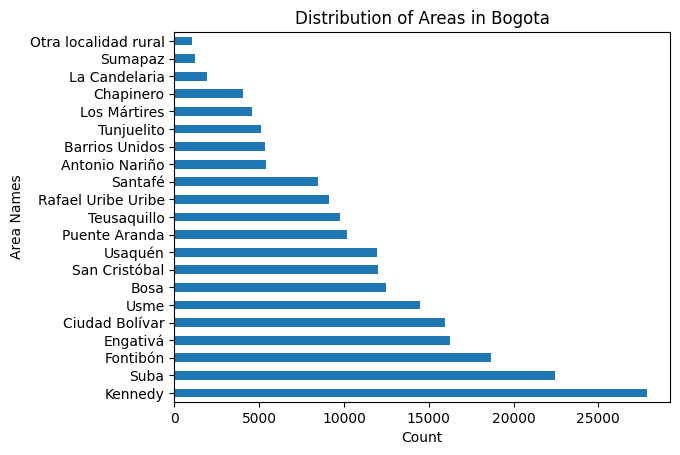

In [ ]:
df_17['NOMLOCALIDAD']=df_17['CODLOCALIDAD']
df_17[['NOMLOCALIDAD']] = df_17[['NOMLOCALIDAD']].replace(localities)
localidades=df_17['NOMLOCALIDAD'].value_counts()
localidades.plot.barh()

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Area Names')
plt.title('Distribution of Areas in Bogota')

# Display the chart
plt.show()

#### Demografia del hogar

**Composición de hogar**

*   NPCEP4 - Edad
*   NPCEP5 - Sexo

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe39093bb80>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe390968100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe39093b8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe390968640>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe3909688e0>],
 'means': []}

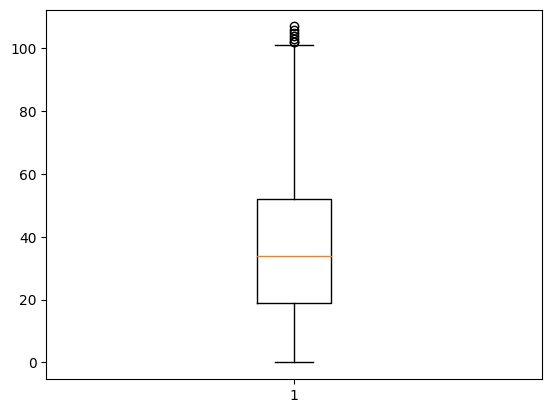

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(df_17['NPCEP4'])

In [ ]:
df_17['NPCEP4'].describe()

count    218379.000000
mean         36.199722
std          21.209548
min           0.000000
25%          19.000000
50%          34.000000
75%          52.000000
max         107.000000
Name: NPCEP4, dtype: float64

Como se puede observar en la gráfica anterior, en promedio, la edad de los encuestados es de 36 años. Adicionalmente, la población sobre la cuál se tomaron los datos se encuentran entre niños recién nacidos y personas de 107 años


In [ ]:
df_17.rename(columns={'NPCEP4': 'Edad'}, inplace=True)

Las filas de encuestas llenadas por personas menores a 16 años de edad fueron eliminadas debido a que son valores con poco sentido. La cantidad de registros con personas menores a 16 años que respondieron la encuesta fue menor al 1% y por este motivo se decide eliminar estos registros

In [ ]:
sexo17=df_17['NPCEP5'].value_counts()
print(sexo17)
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(sexo17.values, labels=sexo17.index, autopct='%1.1f%%')
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

NameError: ignored

In [ ]:
df_17.rename(columns={'NPCEP5': 'Sexo'}, inplace=True)

Como se puede observar en el gráfico anterior la mayoría de las personas registradas en las encuestas

#### Datos de la vivienda y el entorno

**Datos de la vivienda y el entorno**
*   Humedades en el techo y paredes (NVCBP8A)
*   ¿La vivienda presenta:7. Escasa ventilación? (NVCBP8G)
*   Estrato para tarifa: (NVCBP11AA)
*   Contaminación de aire en su vivienda (NVCBP15D)

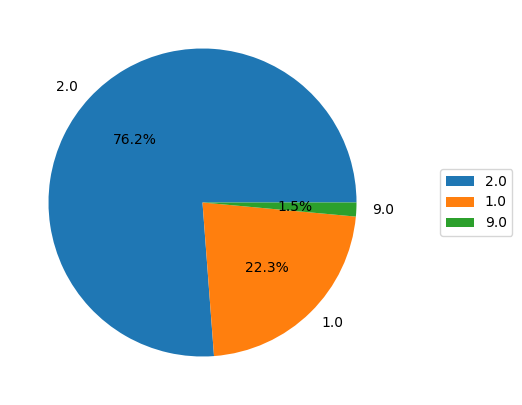

In [ ]:
humedad17 = df_17['NVCBP8A'].value_counts()
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(humedad17.values, labels=humedad17.index, autopct='%1.1f%%')
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

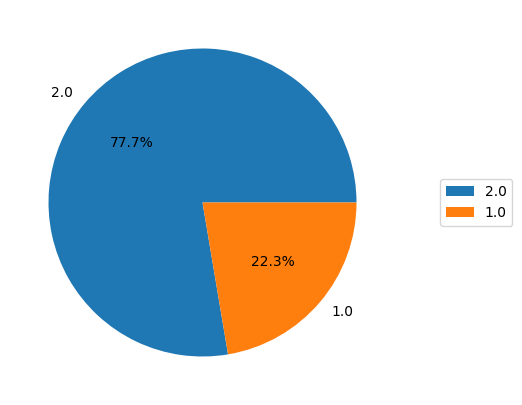

In [ ]:
moda_hume= df_17['NVCBP8A'].mode().iloc[0]
df_17['NVCBP8A'].replace(9, moda_hume, inplace=True)
humedadProcesada = df_17['NVCBP8A'].value_counts()
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(humedadProcesada.values, labels=humedadProcesada.index, autopct='%1.1f%%')
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

In [ ]:
df_17.rename(columns={'NVCBP8A': 'Humedad'}, inplace=True)

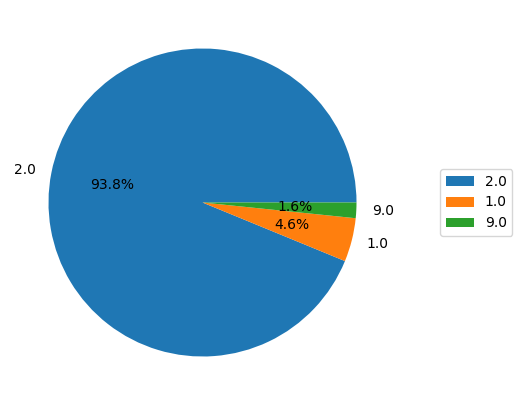

In [ ]:
ventilacion_escasa17=df_17['NVCBP8G'].value_counts()
df_17.rename(columns={'NVCBP8G': 'NivelVentilacion'}, inplace=True)
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(ventilacion_escasa17.values, labels=ventilacion_escasa17.index, autopct='%1.1f%%')
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

In [ ]:
moda_vent= df_17['NivelVentilacion'].mode()
print(moda_vent)

0    2.0
Name: NivelVentilacion, dtype: float64


In [ ]:
df_17['NivelVentilacion'].describe()

count    218379.000000
mean          2.068184
std           0.915998
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           9.000000
Name: NivelVentilacion, dtype: float64

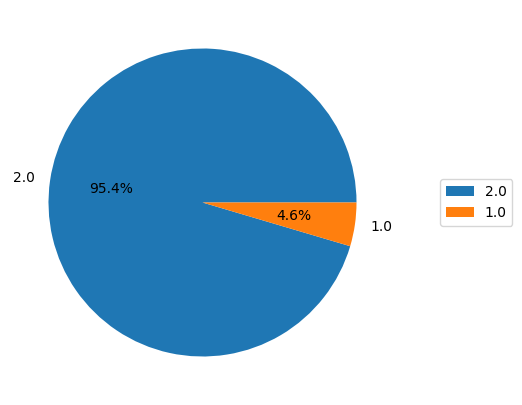

In [ ]:
moda_vent= df_17['NivelVentilacion'].mode().iloc[0]
df_17['NivelVentilacion'].replace(9, moda_vent, inplace=True)
ventilacion_procesada = df_17['NivelVentilacion'].value_counts()
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(ventilacion_procesada.values, labels=ventilacion_procesada.index, autopct='%1.1f%%')
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

In [ ]:
df_17['NVCBP11AA'].value_counts()


2    82008
3    75344
4    28830
1    22612
5     6082
6     2823
       380
0      255
9       30
8       15
Name: NVCBP11AA, dtype: int64

In [ ]:
df_17['NVCBP11AA'] = df_17['NVCBP11AA'].replace(' ', '-1')
df_17['NVCBP11AA'] = df_17['NVCBP11AA'].astype(float)

In [ ]:
df_17['NVCBP11AA'].value_counts()

 2.0    82008
 3.0    75344
 4.0    28830
 1.0    22612
 5.0     6082
 6.0     2823
-1.0      380
 0.0      255
 9.0       30
 8.0       15
Name: NVCBP11AA, dtype: int64

In [ ]:
column_to_check = 'NVCBP11AA'
total_rows = len(df_17)
filtered_rows = len(df_17[~df_17[column_to_check].between(1, 6)])
percentage = (filtered_rows / total_rows) * 100

# Display the percentage
print(f"Percentage of rows with values different from 1 to 6: {percentage:.2f}%")

Percentage of rows with values different from 1 to 6: 0.31%


In [ ]:
estrato_mas_comun=df_17['NVCBP11AA'].mode()
df_17['NVCBP11AA'].replace(-1, estrato_mas_comun[0], inplace=True)
df_17 = df_17[(df_17['NVCBP11AA'] != 0) & (df_17['NVCBP11AA'] != 8) & (df_17['NVCBP11AA'] != 9)]

In [ ]:
df_17['NVCBP11AA'].value_counts()

2.0    82388
3.0    75344
4.0    28830
1.0    22612
5.0     6082
6.0     2823
Name: NVCBP11AA, dtype: int64

<ipython-input-251-771e4a292897>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_17.rename(columns={'NVCBP11A': 'TipoVivienda'}, inplace=True)


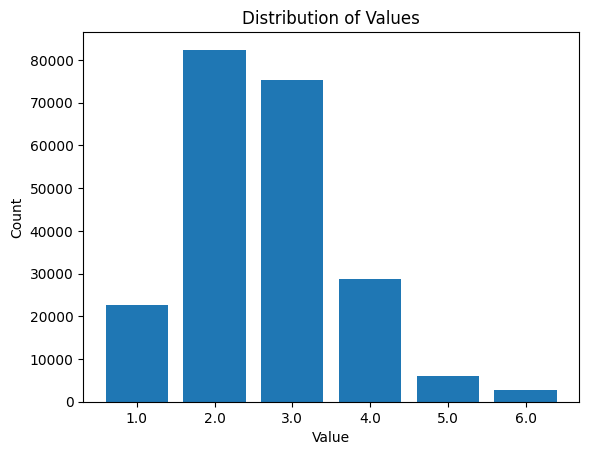

<Figure size 1000x500 with 0 Axes>

In [ ]:
estrato=df_17['NVCBP11AA'].value_counts()
df_17.rename(columns={'NVCBP11A': 'TipoVivienda'}, inplace=True)
plt.bar(estrato.index, estrato.values)

# Set the chart title and axis labels
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Count')
plt.xticks(estrato.index, estrato.index)

# Set the chart size
plt.figure(figsize=(10, 5))

# Display the plot
plt.show()

In [ ]:
df_17.rename(columns={'NVCBP11AA': 'Estrato'}, inplace=True)

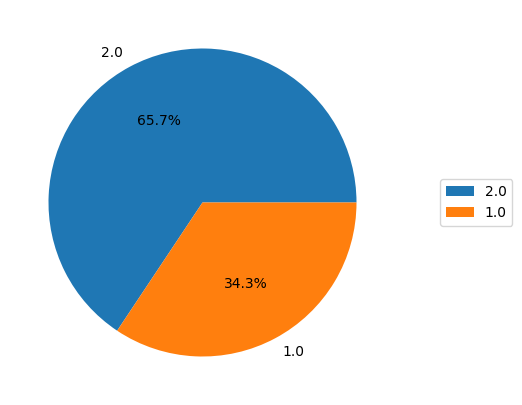

In [ ]:
contAire17 = df_17['NVCBP15D'].value_counts()
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(contAire17.values, labels=contAire17.index, autopct='%1.1f%%')
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

In [ ]:
df_17.rename(columns={'NVCBP15D': 'ContAire'}, inplace=True)

Por lo tanto, a partir de estas columnas se quiere analizar la calidad de vida de las personas dentro de su propio hogar en cuanto a la exposición a ambientes dañinos para su salud

#### Condiciones habitacionales del hogar

**Condiciones de Vida (C)**



*   NHCCP22A - Tiene jardin o patio 
*   NHCCP22D - Tiene azotea o terraza
*   NHCCP26 - ¿Que energia o combustible usa para cocinar?

Con estas se quiere revisar si es expuesto ha algun quimico en su vida diaría y si tiene un espacio con aire libre dentro de su hogar 



In [ ]:
jardinPatio17 = df_17['NHCCP22A'].value_counts()
print(jardinPatio17)

     144854
1     73225
Name: NHCCP22A, dtype: int64


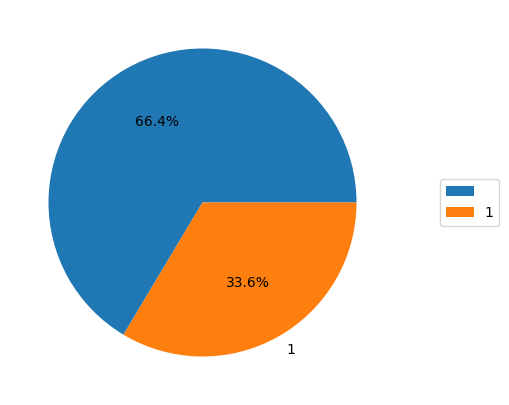

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(jardinPatio17.values, labels=jardinPatio17.index, autopct='%1.1f%%')
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

In [ ]:
df_17.rename(columns={'NHCCP22A': 'JardinPatio'}, inplace=True)

In [ ]:
azoteaTerraza17 = df_17['NHCCP22D'].value_counts()
print(azoteaTerraza17)

     167872
1     50207
Name: NHCCP22D, dtype: int64


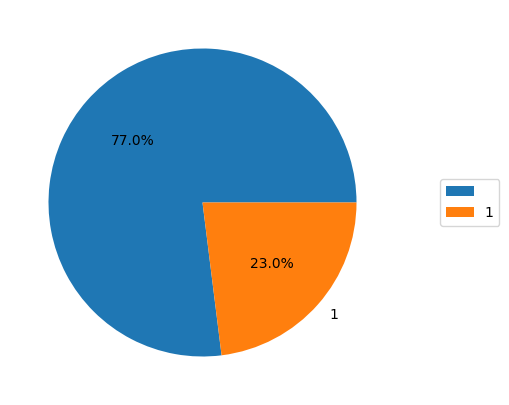

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(azoteaTerraza17.values, labels=azoteaTerraza17.index, autopct='%1.1f%%')
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

In [ ]:
df_17.rename(columns={'NHCCP22D': 'AzoteaTerraza'}, inplace=True)

In [ ]:
combCocinar17 = df_17['NHCCP26'].value_counts()
print(combCocinar17)

2    192738
1     11791
3     10838
7      1464
        806
6       353
4        73
5         9
8         7
Name: NHCCP26, dtype: int64


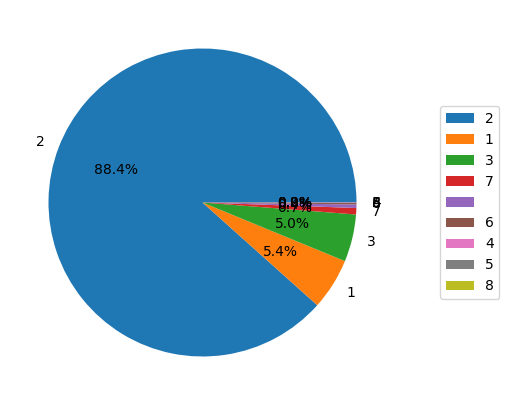

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(combCocinar17.values, labels=combCocinar17.index, autopct='%1.1f%%')
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

In [ ]:
df_17.rename(columns={'NHCCP26': 'CombCocinar'}, inplace=True)

#### Salud

In [ ]:
enfermedadResp17 = df_17['NPCFP14I'].value_counts()
print(enfermedadResp17)
df_17.rename(columns={'NPCFP14F': 'EnfRespiratorias17'}, inplace=True)

2    214946
1      3133
Name: NPCFP14I, dtype: int64


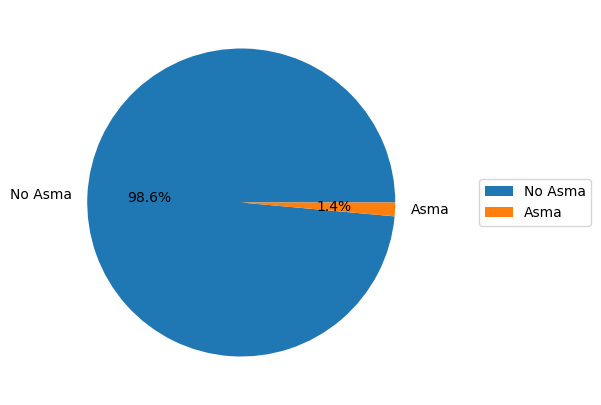

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
nombres = ['No Asma', 'Asma']
ax.pie(enfermedadResp17.values, labels=nombres, autopct='%1.1f%%') # enfermedadResp17.index
ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

In [ ]:
df_17.rename(columns={'NPCFP14I': 'Asma'}, inplace=True)

## Variables finales del Modelo

In [ ]:
df_17.head()

,DIRECTORIO_PER,DIRECTORIO_HOG,DIRECTORIO,SECUENCIA_P,Edad,Sexo,Asma,JardinPatio,AzoteaTerraza,CombCocinar,Humedad,NivelVentilacion,Estrato,ContAire,SECUENCIA,CODLOCALIDAD,NOMLOCALIDAD
0,10100011,1010001,101000,1,56,1,2,1,,2,2.0,2.0,2.0,2.0,1.0,11,Suba
1,10100012,1010001,101000,1,48,2,2,1,,2,2.0,2.0,2.0,2.0,1.0,11,Suba
2,10100013,1010001,101000,1,22,2,2,1,,2,2.0,2.0,2.0,2.0,1.0,11,Suba
3,10100111,1010011,101001,1,42,1,2,1,,2,1.0,2.0,3.0,2.0,1.0,1,Usaquén
4,10100112,1010011,101001,1,43,2,2,1,,2,1.0,2.0,3.0,2.0,1.0,1,Usaquén


In [ ]:
df_out=df_17
df_out.to_csv('2017Procesados.csv', index=False)